#  Exploratory Data Analysis on AMEO Data

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime as dt

## Loading the Dataset

In [3]:
df = pd.read_csv('Data.csv')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

- The dataset contains around 39 independent variables and 3998 data points

## Removing unnecessay columns

In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Renaming the necessary columns

In [7]:
df = df.rename(columns = {'JobCity' : 'Job_City',
                    '10percentage' : 'Percentage_10th',
                    '10board' : 'Board_10th',
                    '12graduation' : 'Graduation_12th_year',
                    '12percentage' : 'Percentage_12th',
                    '12board' : 'Board_12th',})

In [8]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'Job_City', 'Gender',
       'DOB', 'Percentage_10th', 'Board_10th', 'Graduation_12th_year',
       'Percentage_12th', 'Board_12th', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

## Display the First 10 Rows

In [9]:
df.head(10)

,ID,Salary,DOJ,DOL,Designation,Job_City,Gender,DOB,Percentage_10th,Board_10th,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,1027655,300000.0,6/1/14 0:00,present,system engineer,Hyderabad,m,7/2/92 0:00,89.92,state board,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,947847,300000.0,8/1/14 0:00,5/1/15 0:00,java software engineer,Banglore,m,2/1/93 0:00,86.08,state board,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,912934,400000.0,7/1/14 0:00,7/1/15 0:00,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,cbse,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,552574,600000.0,7/1/13 0:00,present,electrical engineer,Noida,m,9/17/91 0:00,90.00,cbse,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,1203363,230000.0,7/1/14 0:00,present,project engineer,Kolkata,m,6/13/93 0:00,77.00,cbse,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


## Display the last 10 rows

In [10]:
df.tail(10)

,ID,Salary,DOJ,DOL,Designation,Job_City,Gender,DOB,Percentage_10th,Board_10th,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3988,466661,200000.0,2/1/13 0:00,7/1/13 0:00,data analyst,Bangalore,f,5/15/91 0:00,74.40,0,...,-1,-1,-1,-1,-1,-0.5332,-0.1232,-0.0537,1.32550,0.5024
3989,1204604,300000.0,9/1/14 0:00,present,software engineer,Bangalore,m,11/23/91 0:00,74.88,state board,...,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.03330,0.6721
3990,204287,480000.0,2/1/12 0:00,present,senior systems engineer,Hyderabad,f,9/4/89 0:00,88.00,0,...,-1,-1,-1,233,-1,0.6646,0.3448,0.3817,-1.34780,0.8183
3991,230873,630000.0,7/1/11 0:00,10/1/14 0:00,systems analyst,Bangalore,m,5/20/90 0:00,80.00,state board,...,-1,-1,-1,393,-1,-1.3447,0.5008,-1.6502,-0.05520,0.0284
3992,344407,800000.0,4/1/14 0:00,4/1/15 0:00,manager,Rajkot,m,6/22/90 0:00,73.00,0,...,-1,-1,-1,-1,480,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,324966,400000.0,2/1/13 0:00,present,senior systems engineer,Chennai,f,2/26/91 0:00,70.60,cbse,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


## Changing DType of Columns to appropriate type

In [11]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOB'] = pd.to_datetime(df['DOB'])

In [12]:
df['DOL'].replace('present',dt.datetime.today(), inplace = True)
df['DOL'] = pd.to_datetime(df['DOL']).dt.date

In [13]:
df.head()

,ID,Salary,DOJ,DOL,Designation,Job_City,Gender,DOB,Percentage_10th,Board_10th,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-03-04,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-03-04,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-03-04,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-03-04,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   Job_City               3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   Percentage_10th        3998 non-null   float64       
 9   Board_10th             3998 non-null   object        
 10  Graduation_12th_year   3998 non-null   int64         
 11  Percentage_12th        3998 non-null   float64       
 12  Board_12th             3998 non-null   object        
 13  Col

In [15]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
Job_City                 0
Gender                   0
DOB                      0
Percentage_10th          0
Board_10th               0
Graduation_12th_year     0
Percentage_12th          0
Board_12th               0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

- There are no missing values present in the data

In [16]:
df.describe()

,ID,Salary,DOJ,DOB,Percentage_10th,Graduation_12th_year,Percentage_12th,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


## Correcting spelling errors in Job_City column

In [17]:
from fuzzywuzzy import process

In [18]:
def correct_spelling_errors(target_word = "", choices = [], threshold = 80):
  match,score = process.extractOne(target_word, choices)
  if score>=threshold:
    return match
  else:
    return target_word

In [19]:
df['Job_City']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: Job_City, Length: 3998, dtype: object

In [20]:
choices = ["Bangalore","Indore","Chennai","Gurgaon","Hyderabad","Kolkata","Pune","Noida","Mohali","Jhansi","Delhi","Bhubaneswar",
           "Mumbai","Mangalore","Rewari","Gaziabad","Bhiwadi","Mysore","Rajkot","Jaipur","Thane","Maharajganj","Thiruvananthapuram",
           "Punchkula","Coimbatore","Dhanbad","Lucknow","Gandhi Nagar","Unnao","Daman and Diu","Visakhapatnam/Vizag","Nagpur","Bhagalpur",
           "Jaisalmer","Ahmedabad","Kochi/Cochin","Bankura","Kanpur","Vijayawada","Beawar","Alwar","Siliguri","Raipur","Bhopal",
           "Faridabad","Jodhpur","Udaipur","Muzaffarpur","Bulandshahar","Haridwar","Raigarh","Aurangabad","Belgaum","Dehradun",
           "Rudrapur","Jamshedpur","Dharamshala","Hissar","Ranchi","Chandigarh","Australia","Cheyyar","sonepat","Pantnagar","Jagdalpur",
           "Angul","Karad","Rajpura","Pilani","Ambala City","Gorakhpur","Patiala","Sambalpur","Haldia","Karnal","Vellore","Dausa",
           "Rourkela","Guwahati","Mohali","Phagwara","Baripada","Meerut","Yamuna Nagar","Shahibabad","Pondichery","Ras Al Khaimah",
           "Jalandhar","Manesar","vapi","Allahabad","Khopoli","Keral","Howrah","Patna","Nellore","Varanasi","Kakinada","Rayagada",
           "Bahadurgarh","Kota","Bhilai","Kolhapur","Surat","Durgapur","Mettur","Nagari","Johannesburg","Bathinda","Joshimath","Kharagpur",
           "London","Kurnool","Tirupati","Bhopal","Jeddah","Nalagarh","Jhajjar","Gulbarga","Muvattupuzha","Shimla","'Bilaspur",
           "Chandrapur","Nanded","Dharmapuri","Vandavasi","Rohtak","Asansol","Tirunelvelli","Ernakulam","Baroda","Ariyalur","Jowai",
           "Neemrana","Dubai","Ahmednagar","Nashik","Bellary","Ludhiana","Gagret","Indirapuram","Gwalior","Hospete","Miryalaguda",
           "Ganjam","Dharuhera","Hubli","Agra","kudankulam","Ongole","Bikaner","Jammu","Al Jubail","Kalmar","Sweden","Jaspur","Burdwan",
           "Shahdol","NCR-Delhi"]
df['Job_City'] = df['Job_City'].apply(lambda city : correct_spelling_errors(str(city),choices))

In [21]:
df['Job_City'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', '-1', 'Mohali', 'Jhansi',
       'Delhi', 'Bhubaneswar', 'Mumbai', 'Mangalore', 'Rewari',
       'Gaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Jaipur', 'Thane',
       'Maharajganj', 'Thiruvananthapuram', 'Punchkula', 'Coimbatore',
       'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi Nagar', 'Yamuna Nagar',
       'Daman and Diu', 'vsakhapttnam', 'Nagpur', 'Bhagalpur',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Kanpur',
       'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur', 'Bhopal',
       'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur', 'Bulandshahar',
       'Haridwar', 'Raigarh', 'Visakhapatnam/Vizag', 'Jagdalpur', 'Unnao',
       'Aurangabad', 'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur',
       'Dharamshala', 'Hissar', 'Ranchi', 'Madurai', 'Chandigarh',
       'Australia', 'Cheyyar', 'sonepat', 'Pantnagar', 'Angul', 'Baroda',
       'Ariyalur', '

In [22]:
df["Job_City"] = df["Job_City"].replace("-1","others")

## Replacing the redundant values of the 10th Board and 12th Board column with 'State Board','CBSE','ICSE'  

In [23]:
df['Board_10th'].value_counts()

Board_10th
cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: count, Length: 275, dtype: int64

In [24]:
df['Board_10th'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'm

In [25]:
state_boards = ['board ofsecondary education,ap', 'state board',
       'mp board bhopal',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
        'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'matric board',
       'board of secondary education',
       'west bengal board of secondary education',
       'jharkhand secondary examination board,ranchi', 'u p board',
       'bseb,patna', 'hsc', 'bse', 'sss pune',
       'karnataka education board (keeb)', 'kerala',
       'state board of secondary education( ssc)', 'gsheb',
       'up(allahabad)', 'nagpur', 'don bosco maatriculation school',
       'karnataka state secondary education board', 'maharashtra',
       'karnataka secondary education board',
       'himachal pradesh board of school education',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'board of secendary education orissa',
       'karantaka secondary education and examination borad', 'hbsc',
       'kseeb(karnataka secondary education examination board)',
       'hbse', 'state(karnataka board)',
       'jharkhand accademic council',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'upbhsie', 'secondary board of rajasthan',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh', 'up baord',
       'state', 'board of intermediate education',
       'state board of secondary education,andhra pradesh',
       'up board , allahabad',
       'stjosephs girls higher sec school,dindigul', 'maharashtra board',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune',
       'board of school education harayana',
       'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'latur',
       'board of secondary education, rajasthan', 'state borad hp',
       'cluny', 'bsepatna', 'up borad', 'ssc board of andrapradesh',
       'matric', 'bse,orissa', 'ssc-andhra pradesh', 'mp',
       'karnataka education board', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka', 'u p',
       'secondary school of education', 'state board of karnataka',
       'karnataka secondary board', 'andhra pradesh board ssc',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'hse,orissa', 'national public school', 'nagpur board',
       'jharkhand academic council', 'bsemp',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education', 'bihar',
       'kerala state board', 'cicse', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'bharathi matriculation school', 'uttaranchal state board',
       'wbbsce', 'mp state board', 'seba(assam)', 'anglo indian', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'msbshse,pune', 'tamilnadu state board', 'kerala university',
       'uttaranchal shiksha avam pariksha parishad',
       'bse(board of secondary education)',
       'bright way college, (up board)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
       'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
       'pune board', 'board of secondary education,orissa',
       'maharashtra state board,pune', 'up bord',
       'kiran english medium high school', 'state board (jac, ranchi)',
       'gujarat board', 'state board ', 'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'karnataka board', 'maharastra board', 'sslc board',
       'ssc maharashtra board', 'tamil nadu state', 'uttrakhand board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ksseb(karnataka state board)', 'nashik board',
       'jharkhand secondary education board', 'himachal pradesh board',
       'maharashtra satate board',
       'maharashtra state board mumbai divisional board',
       'dav public school,hehal',
       'state board of secondary education, ap',
       'rajasthan board of secondary education', 'hsce',
       'karnataka secondary education',
       'board of secondary education,odisha', 'maharashtra nasik board',
       'west bengal board of secondary examination (wbbse)',
       'holy cross matriculation hr sec school', 'cbsc', 'apssc',
       'bseb patna', 'kolhapur', 'bseb, patna', 'up board allahabad',
       'biharboard', 'nagpur board,nagpur', 'pune', 'gyan bharati school',
       'rbse,ajmer', 'board of secondaray education',
       'secondary school education', 'state bord', 'jbse,jharkhand',
       'hse', 'madhya pradesh board', 'bihar school examination board',
       'west bengal board of secondary eucation', 'state boardmp board ',
       'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education', 'latur board',
       "stmary's convent inter college", 'nagpur divisional board',
       'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
       'bihar school examination board patna', 
       'sslc,karnataka', 'mp-bse', 'up bourd', 'dav public school sec 14',
       'board of school education haryana',
       'aurangabad board', 'j&k state board of school education',
       'maharashtra state board of secondary and higher secondary education',
       'maharashtra state boar of secondary and higher secondary education',
       'ssc regular', 'karnataka state examination board', 'nasik',
       'west bengal  board of secondary education', 'up board,allahabad',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'maharashtra state board of secondary & higher secondary education',
       'delhi public school', 'karnataka secondary eduction',
       'secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)', 'apsche',
       'board of  secondary education',
       'board of high school and intermediate education uttarpradesh',
       'kea', 'board of secondary education - andhra pradesh',
       'ap state board for secondary education', 'seba',
       'punjab school education board, mohali',
       'jharkhand acedemic council', 'hse,board',
       'board of ssc education andhra pradesh', 'up-board', 'bse,odisha']

In [26]:
for i in state_boards:
    df['Board_10th'] = df['Board_10th'].replace(i,'State Board')

In [27]:
cbse_boards = ['cbse','central board of secondary education','cbse[gulf zone]','cbse ','central board of secondary education, new delhi','cbse board']
for i in cbse_boards:
    df['Board_10th'] = df['Board_10th'].replace(i,'CBSE')

In [28]:
icse_boards = ['icse','icse board','icse board , new delhi','council for indian school certificate examination']
for i in icse_boards:
    df['Board_10th'] = df['Board_10th'].replace(i,"ICSE")

In [29]:
df['Board_10th'].unique()

array(['State Board', 'CBSE', 'ICSE'], dtype=object)

In [30]:
state_boards=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','intermideate','up bord','andhra pradesh state board','gujarat board']

In [31]:
for i in state_boards:
    df['Board_12th'] = df['Board_12th'].replace(i,'State Board')

In [32]:
cbse_boards = ['cbse','all india board','all indiaboard','central board of secondary education, new delhi', 'cbese']
for i in cbse_boards:
    df['Board_12th'] = df['Board_12th'].replace(i,'CBSE')

In [33]:
icse_boards = [[ 'isc', 'icse', 'isc board', 'isce', 'cicse','isc board , new delhi']]
for i in icse_boards:
    df['Board_12th'] = df['Board_12th'].replace(i,"ICSE")

In [34]:
df['Board_12th'] = df['Board_12th'].replace('0', 'No Input')

In [35]:
df['Board_12th'].unique()

array(['State Board', 'CBSE', 'ICSE', 'No Input'], dtype=object)

In [36]:
df.drop(columns=['CollegeID','CollegeCityID','CollegeCityTier'],axis=1,inplace=True)

In [38]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

## Replacing Specializations with Appropriate Short Forms

In [39]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [40]:
specializations = ['computer engineering',
 'electronics and communication engineering',
 'information technology',
 'computer science & engineering',
 'mechanical engineering',
 'electronics and electrical engineering',
 'electronics & telecommunications',
 'instrumentation and control engineering', 
 'computer application' ,
 'electronics and computer engineering',
 'electrical engineering',
 'applied electronics and instrumentation',
 'electronics & instrumentation eng',
 'information science engineering',
 'civil engineering',
 'mechanical and automation',
 'industrial & production engineering',
 'control and instrumentation engineering',
 'metallurgical engineering',
 'electronics and instrumentation engineering',
 'electronics engineering' ,
 'ceramic engineering',
 'chemical engineering',
 'aeronautical engineering',
 'other',
 'biotechnology',
 'embedded systems technology',
 'electrical and power engineering',
 'computer science and technology'
 'mechatronics',
 'automobile/automotive engineering',
 'polymer technology',
 'mechanical & production engineering',
 'power systems and automation' ,
 'instrumentation engineering',
 'telecommunication engineering',
 'industrial & management engineering' ,
 'industrial engineering',
 'computer and communication engineering',
 'information & communication technology',
 'information science',
 'internal combustion engine',
 'computer networking',
 'biomedical engineering',
 'electronics',
 'computer science']

specializations_short = ['CS',
 'EC',
 'IT',
 'CS',
 'ME',
 'EE',
 'EC',
 'EC', 
 'CS',
 'EC',
 'EE',
 'EC',
 'EC',
 'IT',
 'CE',
 'ME',
 'OTHER',
 'EE',
 'OTHER',
 'EC',
 'EC' ,
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'OTHER',
 'EC',
 'EE',
 'CS'
 'ME',
 'ME',
 'OTHER',
 'ME',
 'EE' ,
 'EE',
 'EC',
 'OTHER' ,
 'OTHER',
 'CS',
 'IT',
 'IT',
 'ME',
 'CS',
 'OTHER',
 'EC',
 'CS']

In [41]:
df['Specialization'].replace(specializations, specializations_short, inplace=True)

In [42]:
df['Specialization'].unique()

array(['CS', 'EC', 'IT', 'ME', 'EE', 'CE', 'OTHER',
       'computer science and technology', 'mechatronics'], dtype=object)

In [43]:
df['Specialization'].replace('computer science and technology', 'CS', inplace = True)
df['Specialization'].replace('mechatronics','ME', inplace = True)

In [44]:
df['Specialization'].unique()

array(['CS', 'EC', 'IT', 'ME', 'EE', 'CE', 'OTHER'], dtype=object)

## After Data Cleaning

In [45]:
df.head()

,ID,Salary,DOJ,DOL,Designation,Job_City,Gender,DOB,Percentage_10th,Board_10th,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-03-04,senior quality engineer,Bangalore,f,1990-02-19,84.3,State Board,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-03-04,assistant manager,Indore,m,1989-10-04,85.4,CBSE,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-03-04,systems engineer,Chennai,f,1992-08-03,85.0,CBSE,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-03-04,senior software engineer,Gurgaon,m,1989-12-05,85.6,CBSE,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,CBSE,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [46]:
df.shape

(3998, 35)

In [47]:
df.describe()

,ID,Salary,DOJ,DOB,Percentage_10th,Graduation_12th_year,Percentage_12th,CollegeTier,collegeGPA,GraduationYear,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,1.925713,71.486171,2012.105803,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,2.000000,66.407500,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,2.000000,71.720000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,2.000000,76.327500,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,2.000000,99.930000,2017.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,0.262270,8.167338,31.857271,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


## Seperating numerical and categorical columns

In [48]:
numerical_df = df.select_dtypes(include=[np.number])
numerical_df

,ID,Salary,Percentage_10th,Graduation_12th_year,Percentage_12th,CollegeTier,collegeGPA,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,84.30,2007,95.80,2,78.00,2011,515,585,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,85.40,2007,85.00,2,70.06,2012,695,610,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,85.00,2010,68.20,2,70.00,2014,615,545,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,85.60,2007,83.60,1,74.64,2011,635,585,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,78.00,2008,76.80,2,73.90,2012,545,625,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,52.09,2006,55.50,2,61.50,2010,365,334,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,90.00,2009,93.00,2,77.30,2013,415,410,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,81.86,2008,65.50,2,70.00,2012,475,475,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,78.72,2010,69.88,2,70.42,2014,450,410,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [49]:
numerical_df.drop('ID', axis = 1, inplace = True)
numerical_df.columns

Index(['Salary', 'Percentage_10th', 'Graduation_12th_year', 'Percentage_12th',
       'CollegeTier', 'collegeGPA', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [50]:
categorical_df = df.select_dtypes(include=[object])
categorical_df

,DOL,Designation,Job_City,Gender,Board_10th,Board_12th,Degree,Specialization,CollegeState
0,2024-03-04,senior quality engineer,Bangalore,f,State Board,State Board,B.Tech/B.E.,CS,Andhra Pradesh
1,2024-03-04,assistant manager,Indore,m,CBSE,CBSE,B.Tech/B.E.,EC,Madhya Pradesh
2,2024-03-04,systems engineer,Chennai,f,CBSE,CBSE,B.Tech/B.E.,IT,Uttar Pradesh
3,2024-03-04,senior software engineer,Gurgaon,m,CBSE,CBSE,B.Tech/B.E.,CS,Delhi
4,2015-03-01,get,Manesar,m,CBSE,CBSE,B.Tech/B.E.,EC,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...
3993,2012-10-01,software engineer,Delhi,m,CBSE,CBSE,B.Tech/B.E.,IT,Haryana
3994,2013-07-01,technical writer,Hyderabad,f,State Board,State Board,B.Tech/B.E.,EC,Telangana
3995,2024-03-04,associate software engineer,Bangalore,m,State Board,State Board,B.Tech/B.E.,CS,Orissa
3996,2015-01-01,software developer,Bangalore,f,State Board,State Board,B.Tech/B.E.,CS,Karnataka


## Univariate Analysis - Non Visual

In [51]:
numerical_df.head()

,Salary,Percentage_10th,Graduation_12th_year,Percentage_12th,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,84.3,2007,95.8,2,78.00,2011,515,585,525,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,85.4,2007,85.0,2,70.06,2012,695,610,780,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,85.0,2010,68.2,2,70.00,2014,615,545,370,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,85.6,2007,83.6,1,74.64,2011,635,585,625,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,78.0,2008,76.8,2,73.90,2012,545,625,465,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [52]:
for col_name in numerical_df.columns:
    print("*"*10, col_name, "*"*10)
    print(numerical_df[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
    print()

********** Salary **********
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64

********** Percentage_10th **********
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: Percentage_10th, dtype: float64

********** Graduation_12th_year **********
min       1995.000000
max       2013.000000
mean      2008.087544
median    2008.000000
std          1.653599
Name: Graduation_12th_year, dtype: float64

********** Percentage_12th **********
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: Percentage_12th, dtype: float64

********** CollegeTier **********
min       1.000000
max       2.000000
mean      1.925713
median    2.000000
std       0.262270
Name: CollegeTier, dtype: float64

********** collegeGPA **********
min        6.450000
max       99.930000
mean      71.486171
median    71.72000

In [53]:
categorical_df.head()

,DOL,Designation,Job_City,Gender,Board_10th,Board_12th,Degree,Specialization,CollegeState
0,2024-03-04,senior quality engineer,Bangalore,f,State Board,State Board,B.Tech/B.E.,CS,Andhra Pradesh
1,2024-03-04,assistant manager,Indore,m,CBSE,CBSE,B.Tech/B.E.,EC,Madhya Pradesh
2,2024-03-04,systems engineer,Chennai,f,CBSE,CBSE,B.Tech/B.E.,IT,Uttar Pradesh
3,2024-03-04,senior software engineer,Gurgaon,m,CBSE,CBSE,B.Tech/B.E.,CS,Delhi
4,2015-03-01,get,Manesar,m,CBSE,CBSE,B.Tech/B.E.,EC,Uttar Pradesh


In [54]:
for col_name in categorical_df.columns:
    print("*"*10, col_name, "*"*10)
    print(categorical_df[col_name].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', categorical_df[col_name].value_counts())
    print()

********** DOL **********
count                                                   3998
nunique                                                   67
unique     [2024-03-04, 2015-03-01, 2015-05-01, 2015-07-0...
Name: DOL, dtype: object
Value Counts: 
 DOL
2024-03-04    1875
2015-04-01     573
2015-03-01     124
2015-05-01     112
2015-01-01      99
              ... 
2005-03-01       1
2015-10-01       1
2010-02-01       1
2011-02-01       1
2010-10-01       1
Name: count, Length: 67, dtype: int64

********** Designation **********
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 
 Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
               

## Univariate Analysis - Visual

### Numerical Columns

In [55]:
numerical_df.columns

Index(['Salary', 'Percentage_10th', 'Graduation_12th_year', 'Percentage_12th',
       'CollegeTier', 'collegeGPA', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

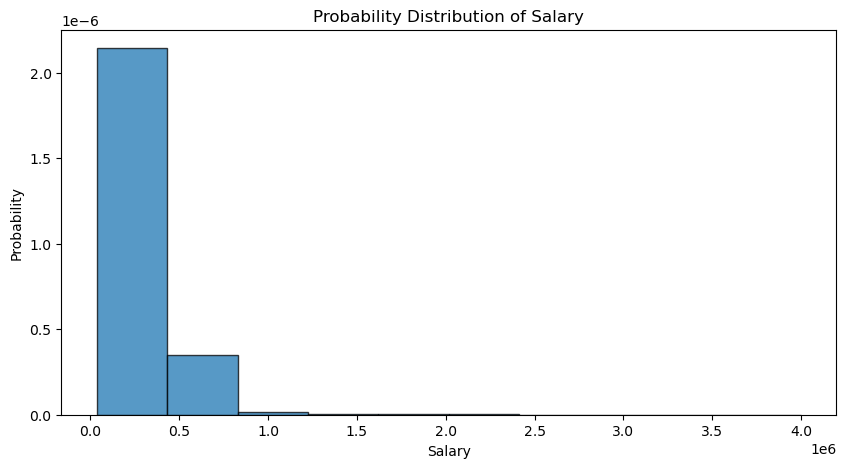

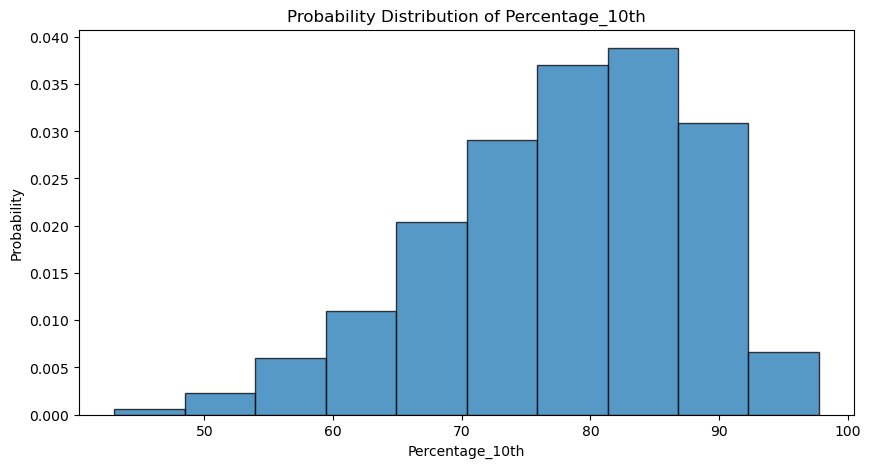

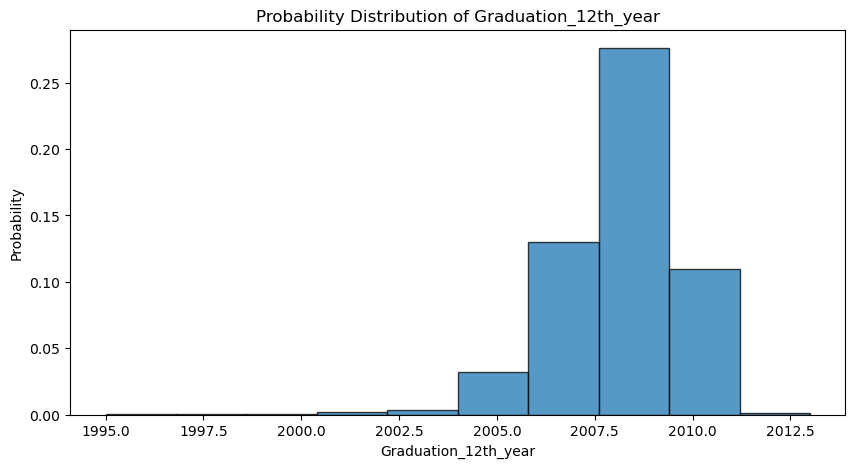

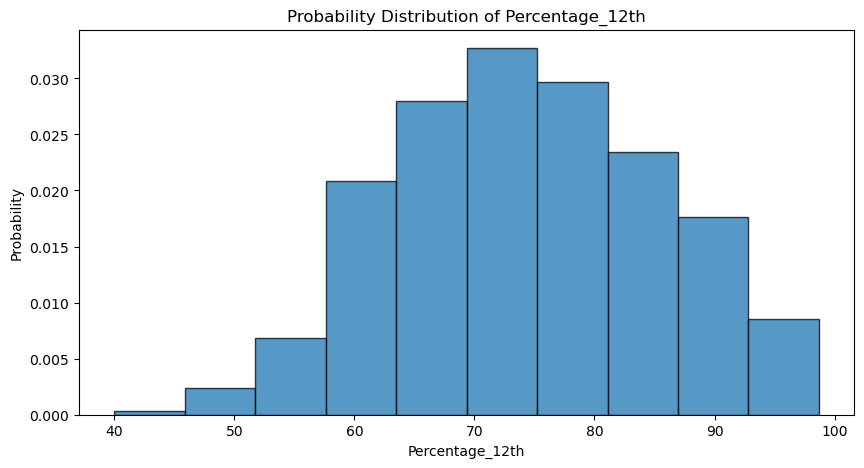

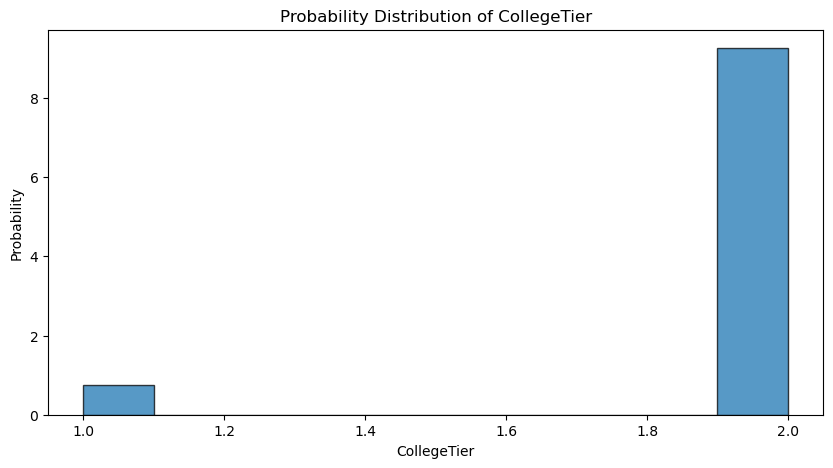

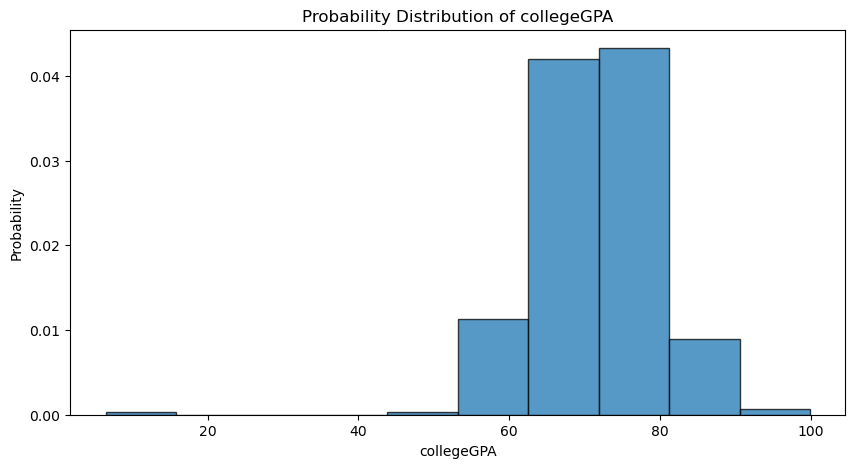

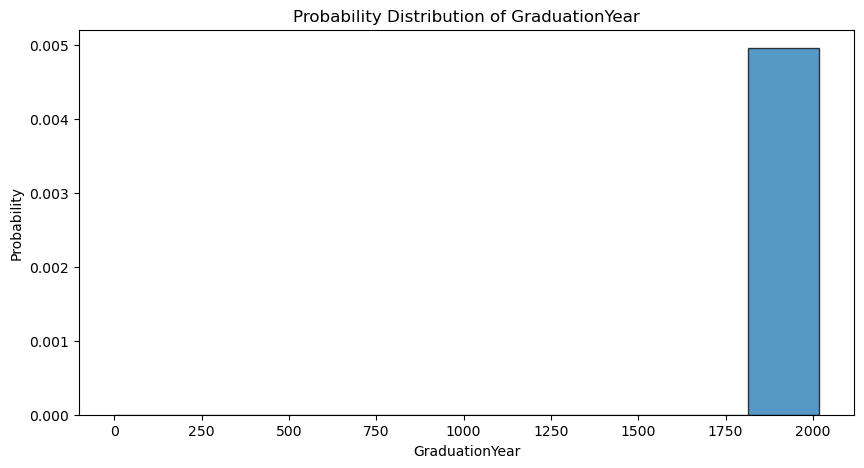

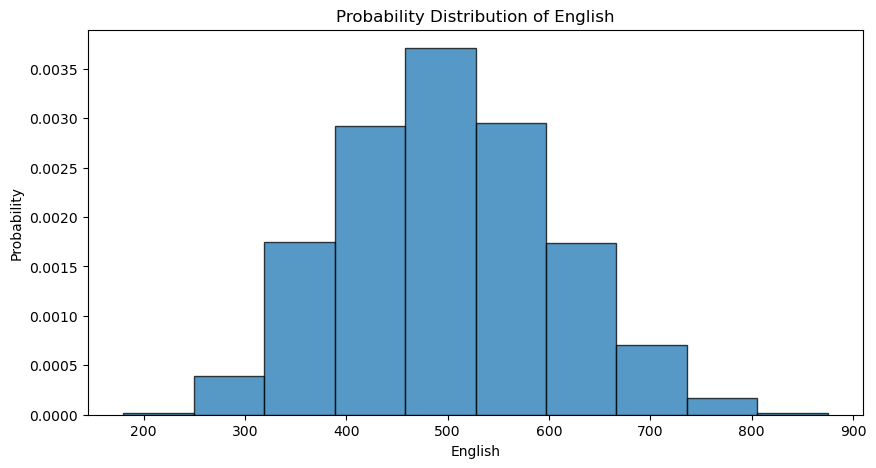

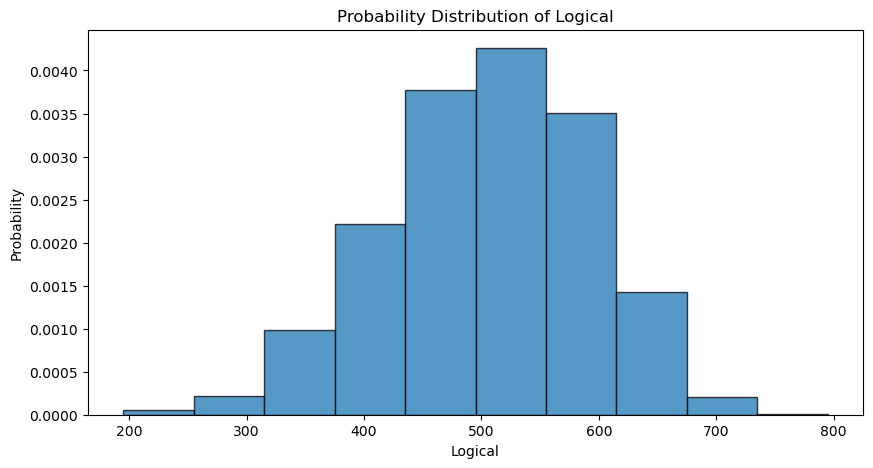

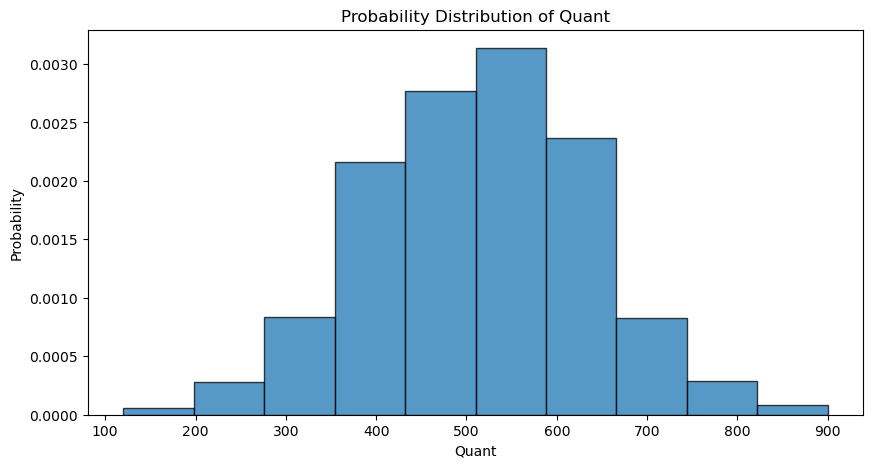

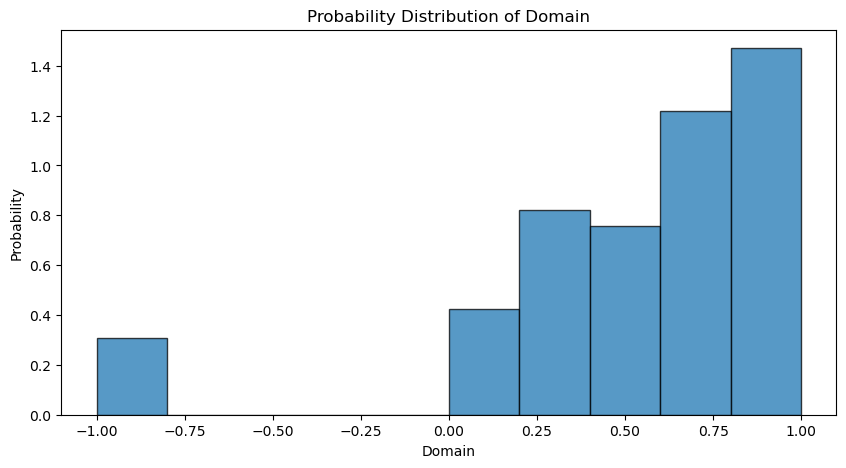

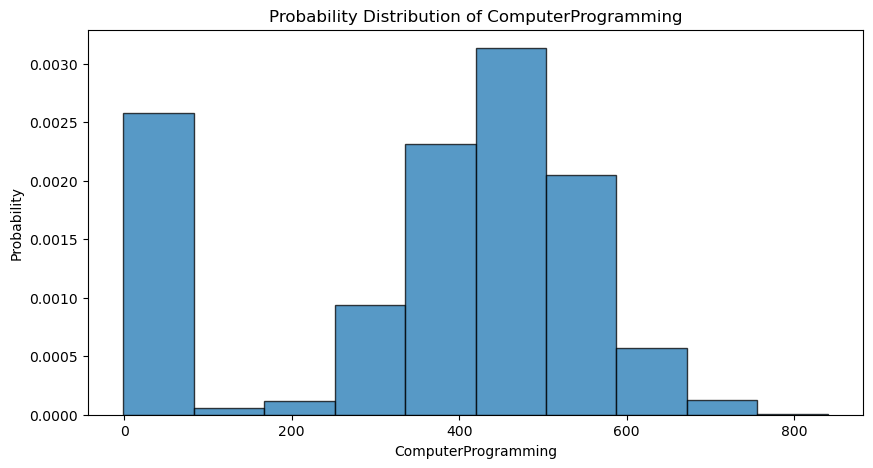

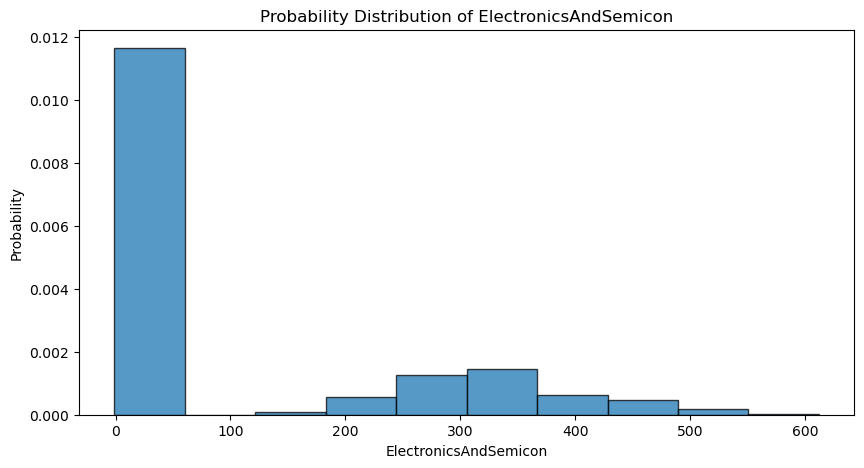

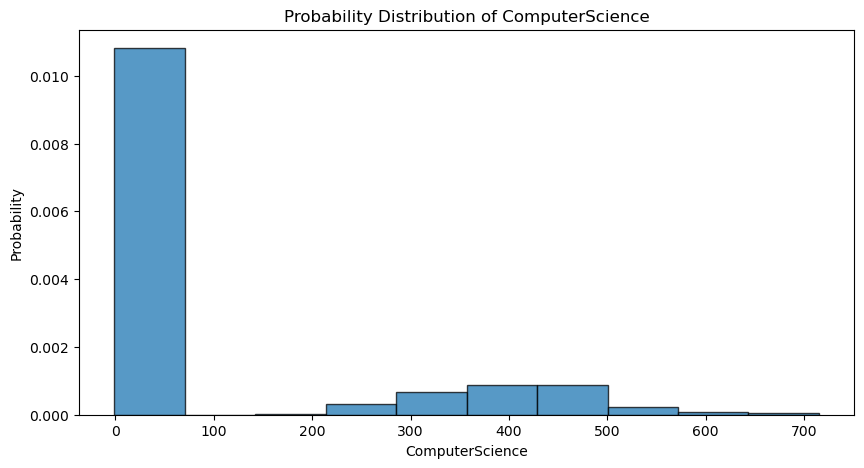

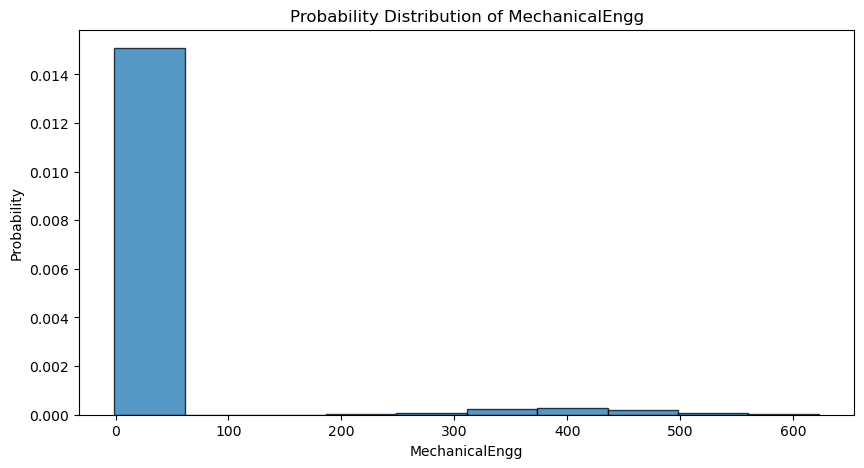

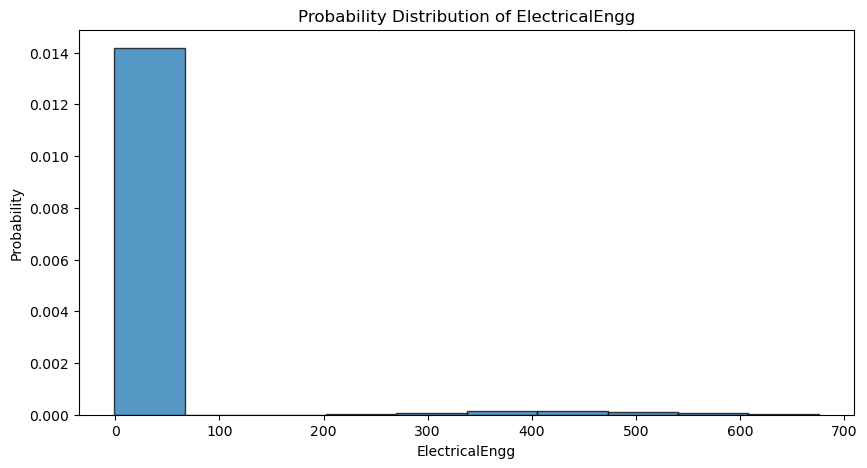

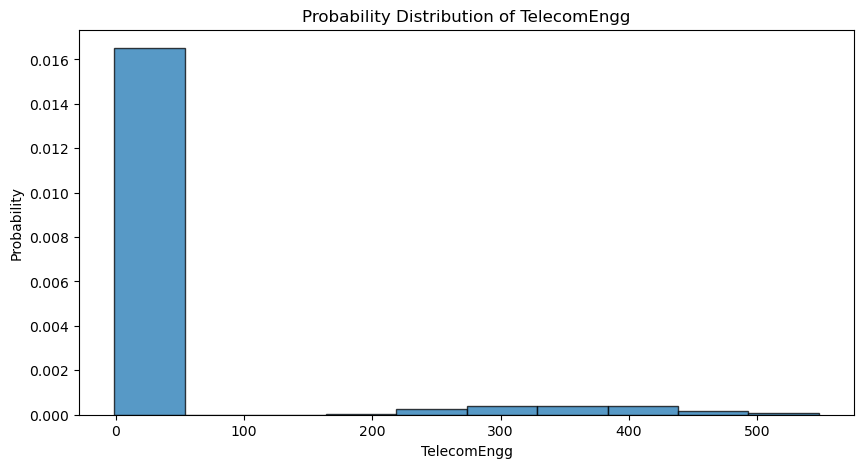

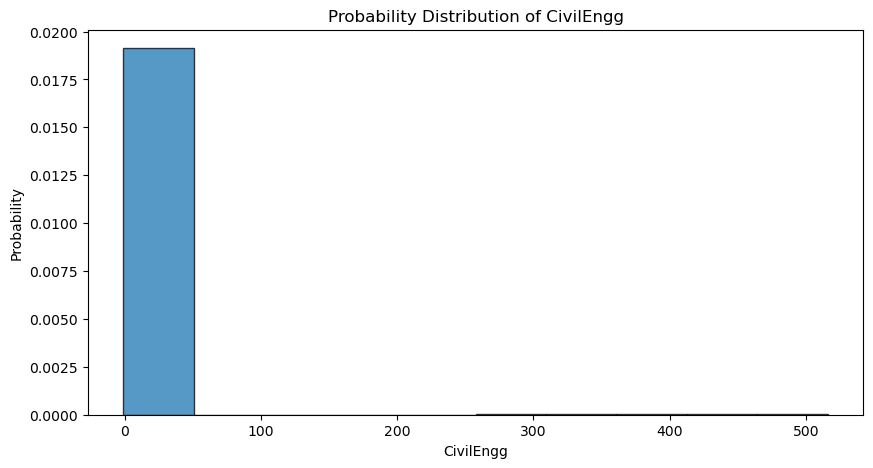

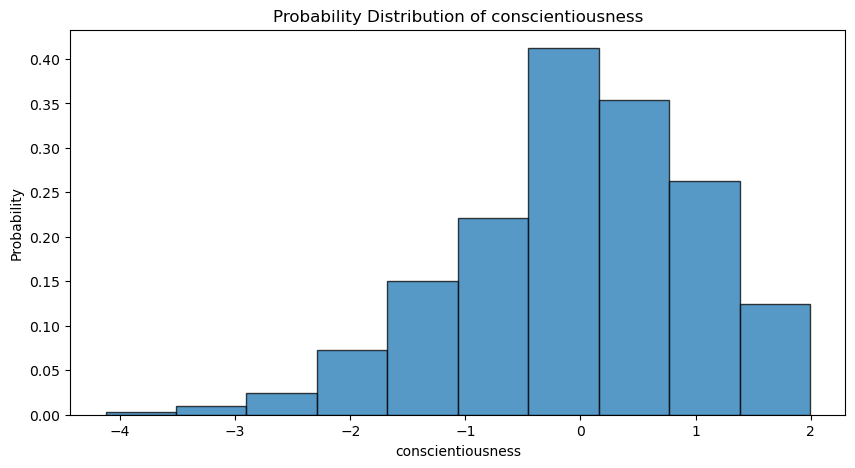

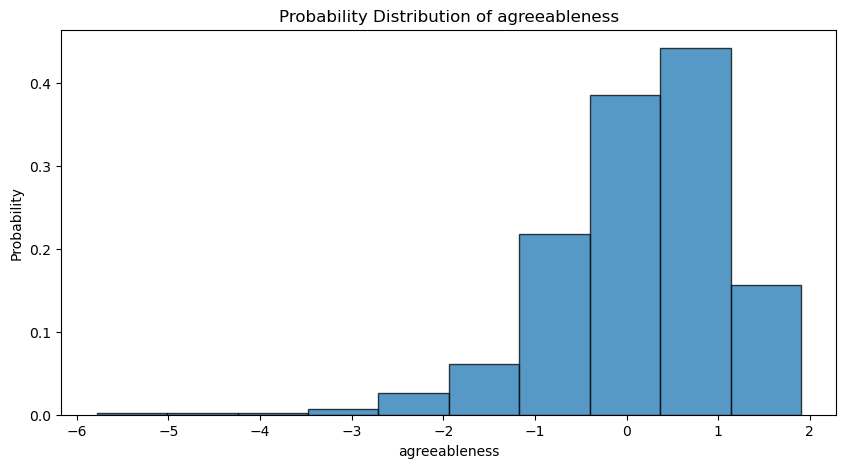

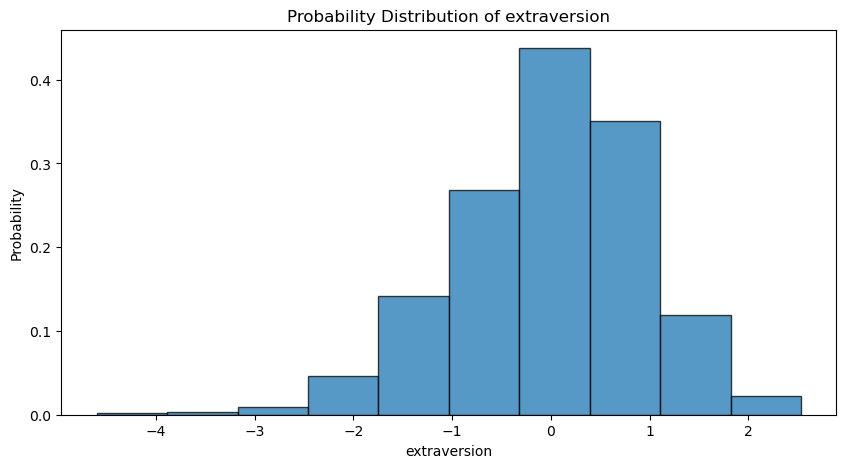

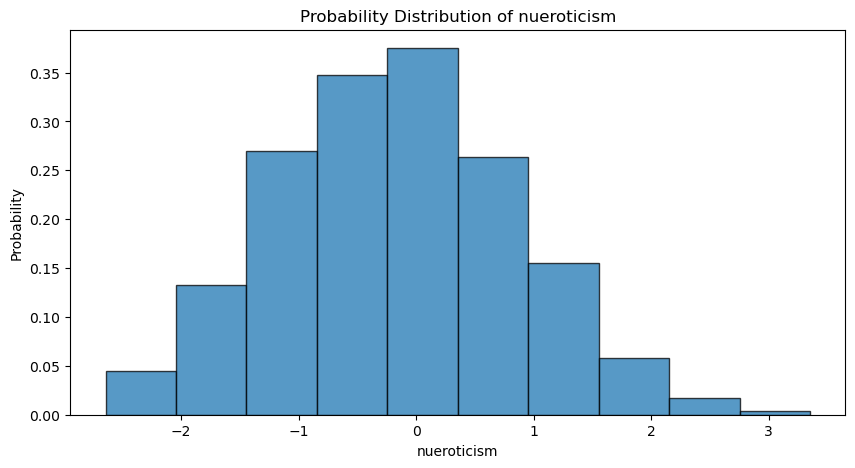

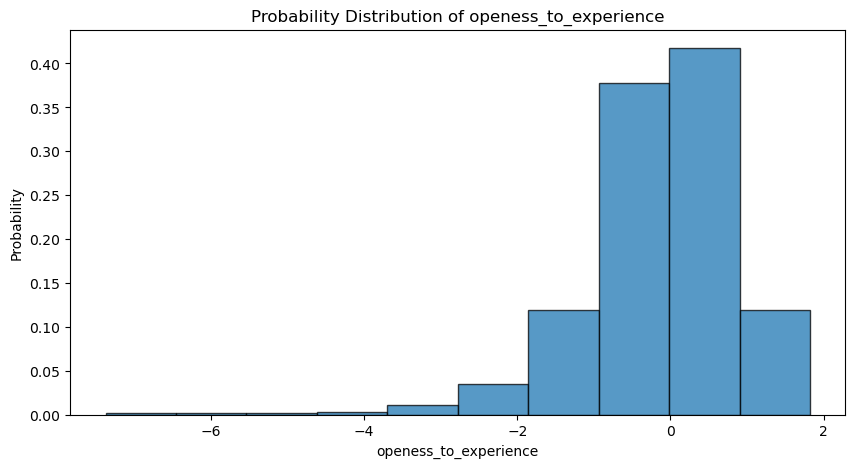

In [56]:
for column in numerical_df.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(numerical_df[column], bins=10, density=True, alpha=0.75,edgecolor='black')
    plt.title(f'Probability Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.show()

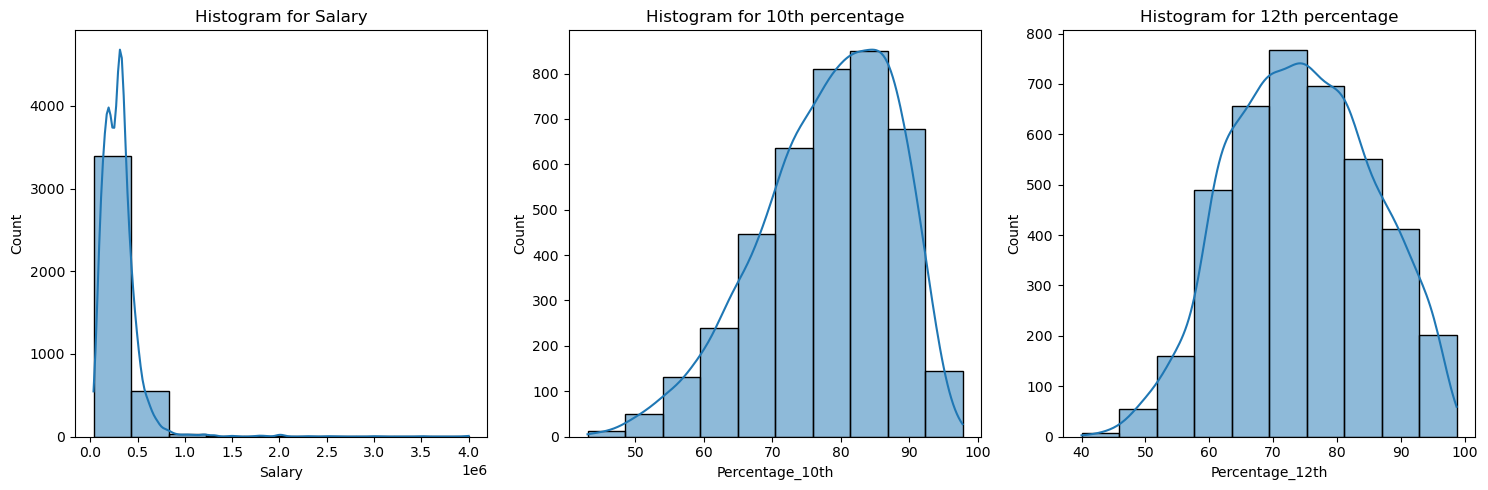

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['Salary'], bins=10, kde=True)
plt.title('Histogram for Salary')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['Percentage_10th'], bins=10, kde=True)
plt.title('Histogram for 10th percentage')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['Percentage_12th'], bins=10, kde=True)
plt.title('Histogram for 12th percentage')

plt.tight_layout()

plt.show()

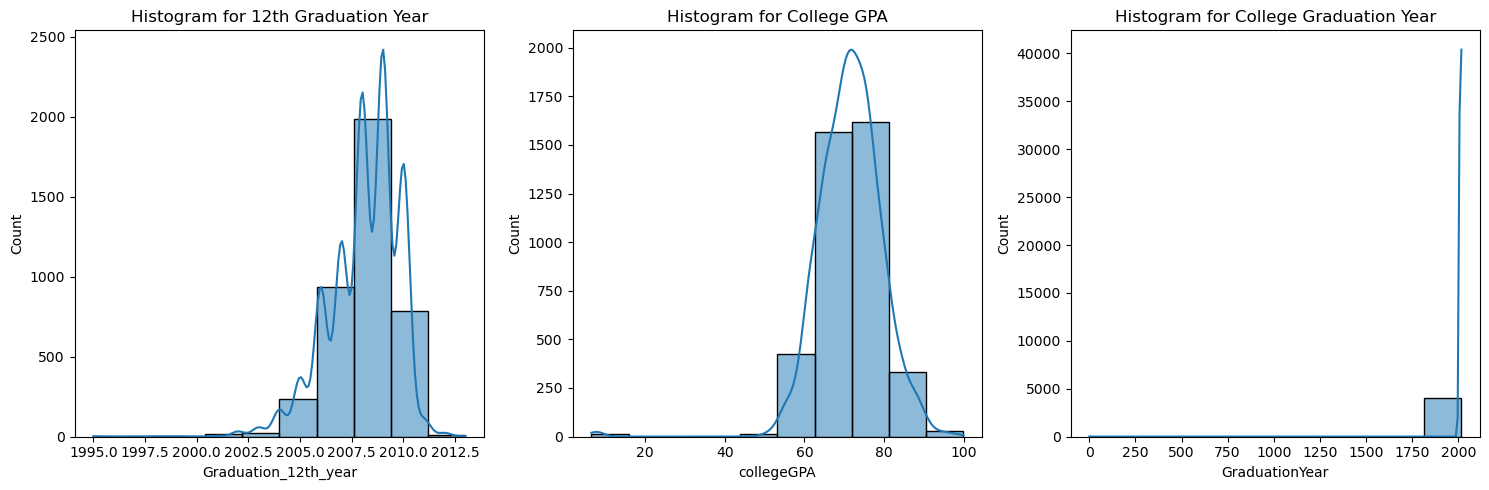

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['Graduation_12th_year'], bins=10, kde=True)
plt.title('Histogram for 12th Graduation Year')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['collegeGPA'], bins=10, kde=True)
plt.title('Histogram for College GPA')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['GraduationYear'], bins=10, kde=True)
plt.title('Histogram for College Graduation Year')

plt.tight_layout()

plt.show()

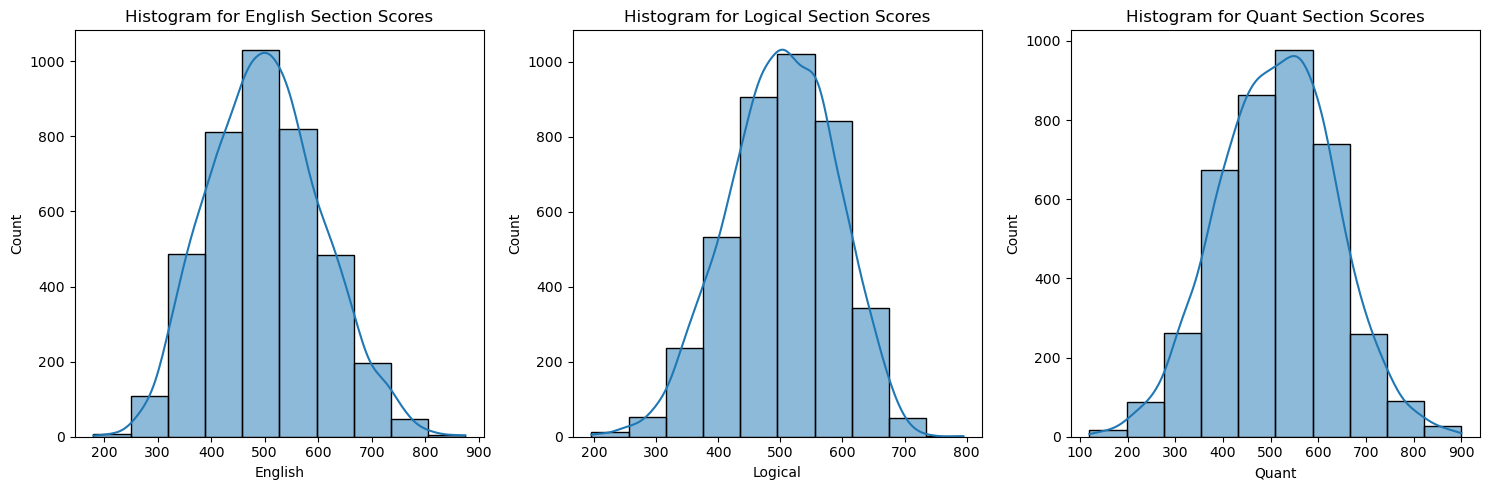

In [59]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['English'], bins=10, kde=True)
plt.title('Histogram for English Section Scores')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['Logical'], bins=10, kde=True)
plt.title('Histogram for Logical Section Scores')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['Quant'], bins=10, kde=True)
plt.title('Histogram for Quant Section Scores')

plt.tight_layout()

plt.show()

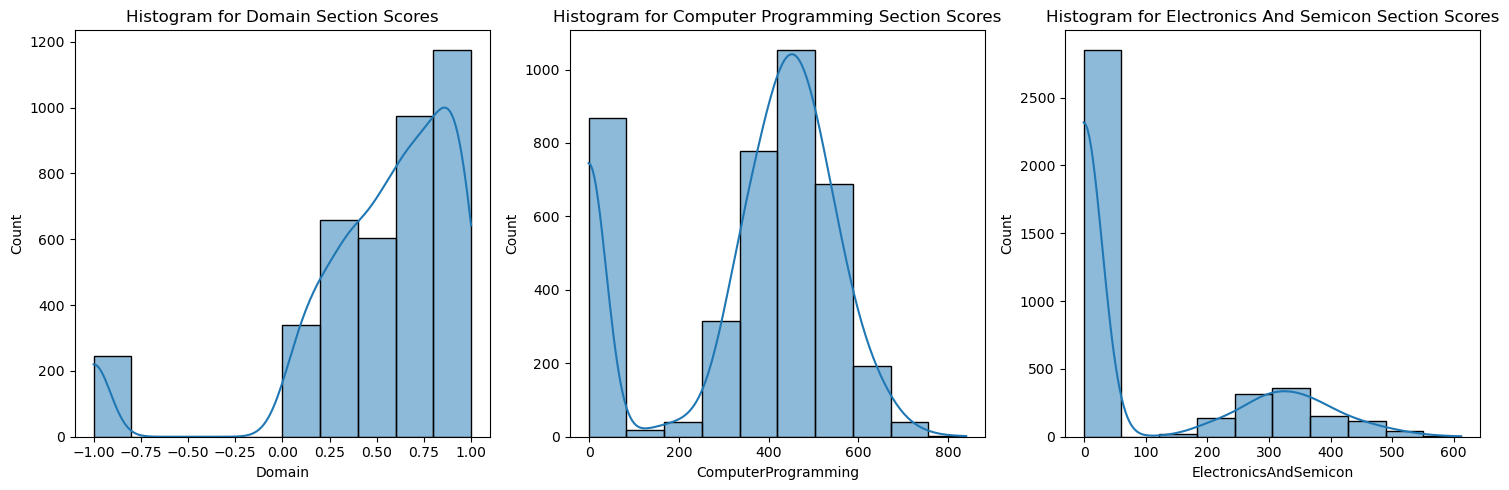

In [60]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['Domain'], bins=10, kde=True)
plt.title('Histogram for Domain Section Scores')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['ComputerProgramming'], bins=10, kde=True)
plt.title('Histogram for Computer Programming Section Scores')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['ElectronicsAndSemicon'], bins=10, kde=True)
plt.title('Histogram for Electronics And Semicon Section Scores')

plt.tight_layout()

plt.show()

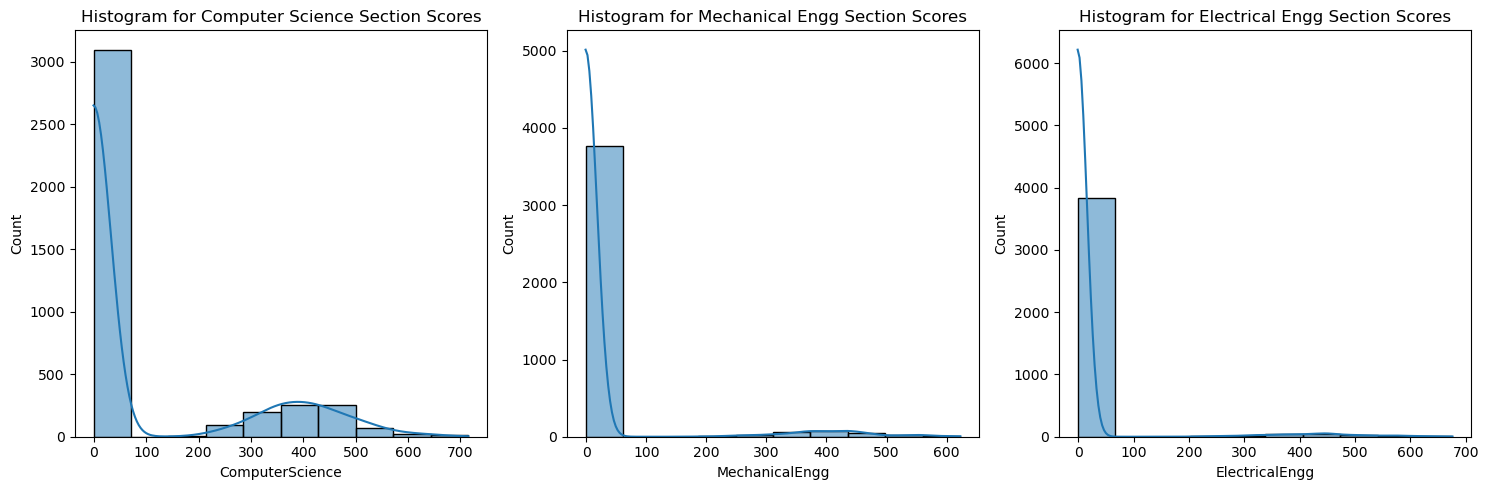

In [61]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['ComputerScience'], bins=10, kde=True)
plt.title('Histogram for Computer Science Section Scores')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['MechanicalEngg'], bins=10, kde=True)
plt.title('Histogram for Mechanical Engg Section Scores')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['ElectricalEngg'], bins=10, kde=True)
plt.title('Histogram for Electrical Engg Section Scores')

plt.tight_layout()

plt.show()

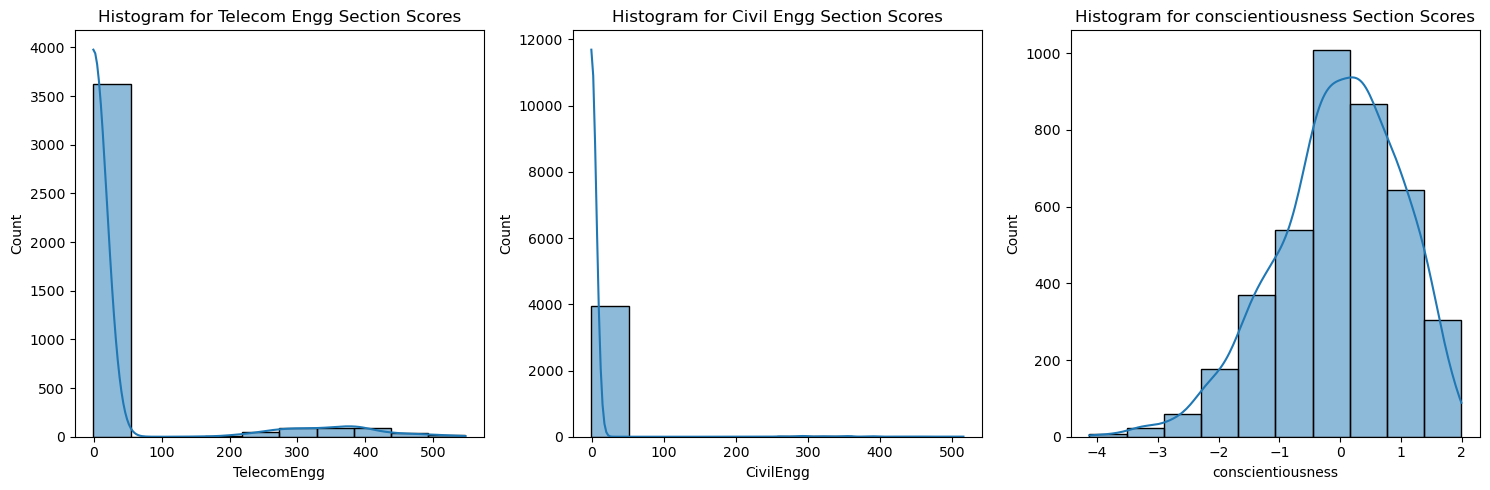

In [62]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['TelecomEngg'], bins=10, kde=True)
plt.title('Histogram for Telecom Engg Section Scores')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['CivilEngg'], bins=10, kde=True)
plt.title('Histogram for Civil Engg Section Scores')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['conscientiousness'], bins=10, kde=True)
plt.title('Histogram for conscientiousness Section Scores')

plt.tight_layout()

plt.show()

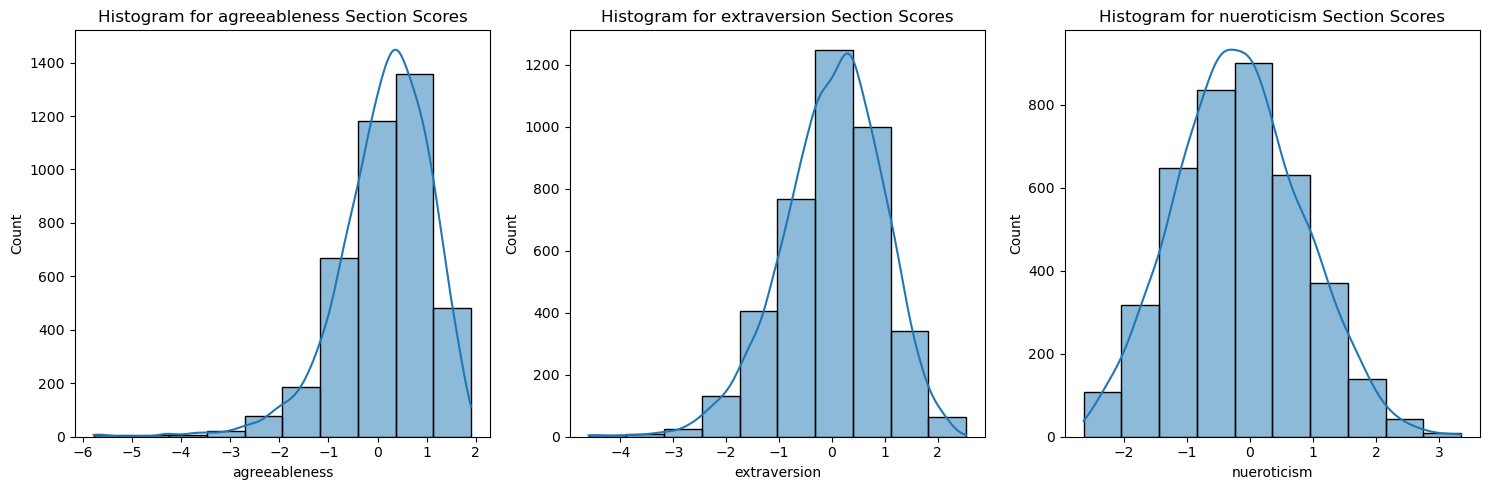

In [63]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(numerical_df['agreeableness'], bins=10, kde=True)
plt.title('Histogram for agreeableness Section Scores')

plt.subplot(1, 3, 2)
sns.histplot(numerical_df['extraversion'], bins=10, kde=True)
plt.title('Histogram for extraversion Section Scores')

plt.subplot(1, 3, 3)
sns.histplot(numerical_df['nueroticism'], bins=10, kde=True)
plt.title('Histogram for nueroticism Section Scores')

plt.tight_layout()

plt.show()

### From the above visualizations we can observe that
#### 1. Most of the people are earning below 1000000.
#### 2. Most of the people scored in the range of 75 to 85 percent in their 10th Standard.
#### 3. Most of the people scored in the range of 70 to 75 percent in their 12th Standard.
#### 4. In AMCAT English, Logical, Quant Sections most people scored between 500 to 600 marks.
#### 5. Most of the people scored less than 100 in Computer Science, Mechanical Engg,Electrical Engg Sections.
#### 6. In the Personality Sections most of the people got scores in the range between -1 and 1.

### Categorical Columns

In [64]:
categorical_df.columns

Index(['DOL', 'Designation', 'Job_City', 'Gender', 'Board_10th', 'Board_12th',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

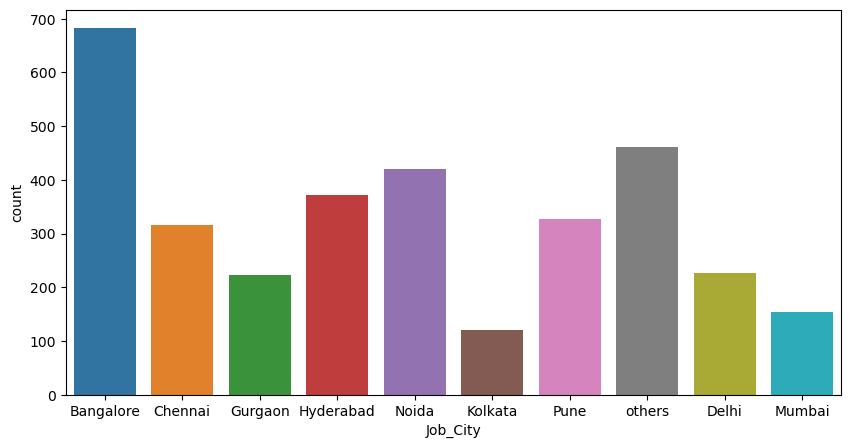

In [65]:
top_values=categorical_df['Job_City'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.countplot(x='Job_City', data=categorical_df[categorical_df['Job_City'].isin(top_values)])
plt.show()

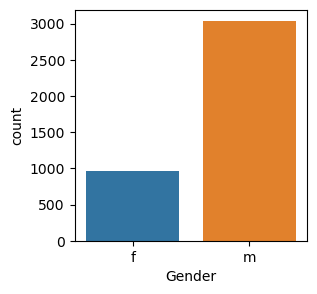

In [66]:
plt.figure(figsize=(3, 3))  # Adjust the figure size
sns.countplot(x='Gender', data=categorical_df)
plt.show()

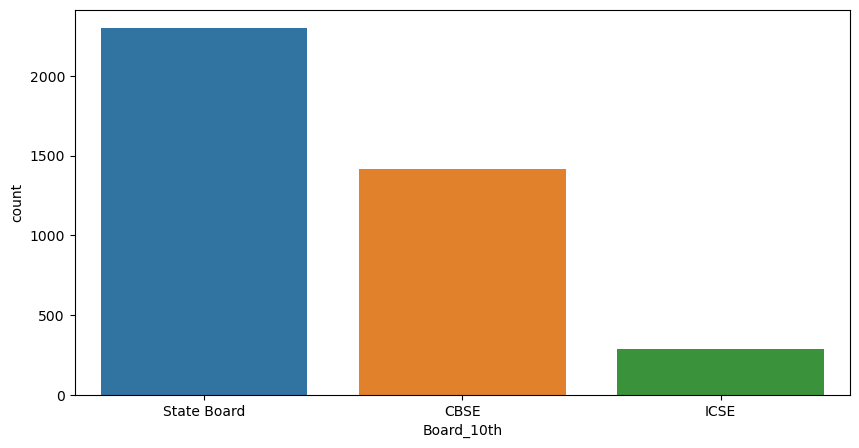

In [67]:
plt.figure(figsize=(10, 5))  # Adjust the figure size
sns.countplot(x='Board_10th', data=categorical_df)
plt.show()

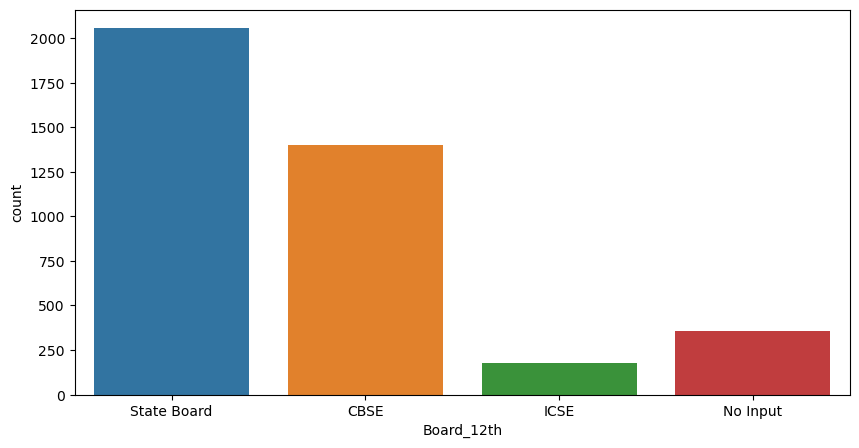

In [68]:
plt.figure(figsize=(10, 5))  # Adjust the figure size
sns.countplot(x='Board_12th', data=categorical_df)
plt.show()

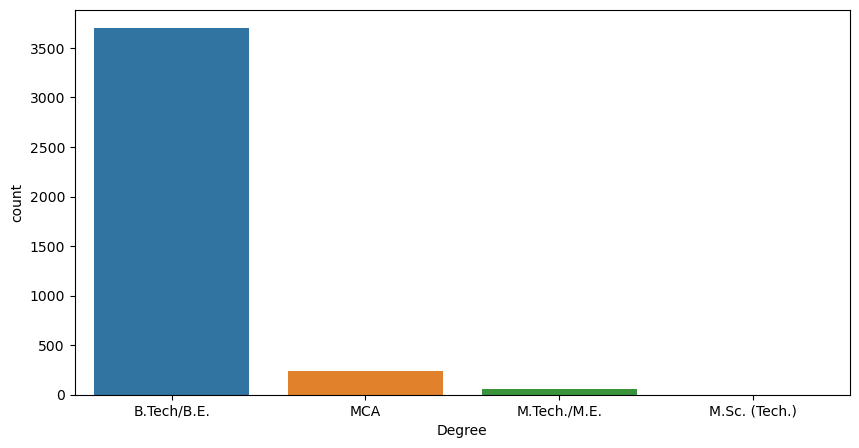

In [69]:
plt.figure(figsize=(10, 5))  # Adjust the figure size
sns.countplot(x='Degree', data=categorical_df)
plt.show()

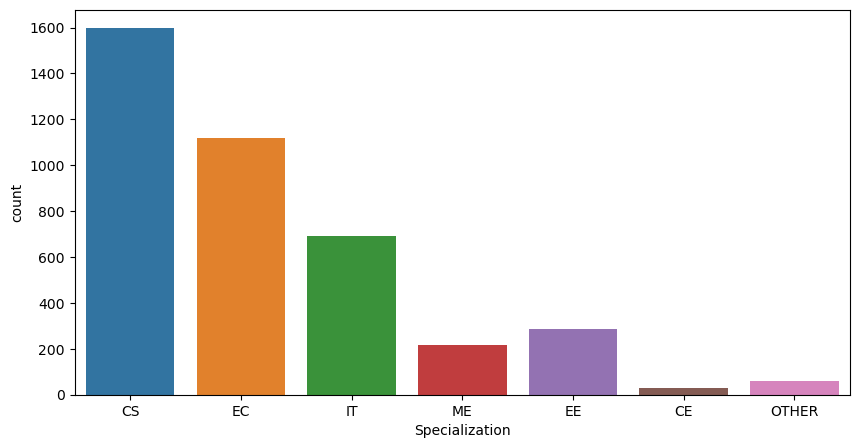

In [70]:
plt.figure(figsize=(10, 5))  # Adjust the figure size
sns.countplot(x='Specialization', data=categorical_df)
plt.show()

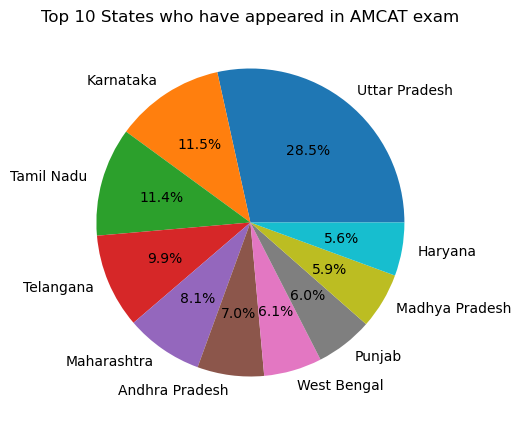

In [71]:
top_values = categorical_df['CollegeState'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%')
plt.title('Top 10 States who have appeared in AMCAT exam')
plt.show()

### From the above visualizations we can observe that
#### 1. Male professionals are in large number when compared to that of female professionals.
#### 2. Most of people completed their 10th standard from State Board or CBSE.
#### 3. Most of people completed their 12th standard from State Board or CBSE.
#### 4. Majority of the people enrolled in B.Tech/B.E Degree.
#### 5. Most people are from Computer Science, Information Technology and Electronics Communication background.
#### 6. Most of the people appeared for AMCAT exam are from Uttar Pradesh.

## Bivariate Analysis

In [72]:
numerical_df.columns

Index(['Salary', 'Percentage_10th', 'Graduation_12th_year', 'Percentage_12th',
       'CollegeTier', 'collegeGPA', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [73]:
categorical_df.columns

Index(['DOL', 'Designation', 'Job_City', 'Gender', 'Board_10th', 'Board_12th',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

In [74]:
df.groupby('Gender')[['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience']].mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


#### Females have good personality traits when compared to males

### Salary vs College GPA

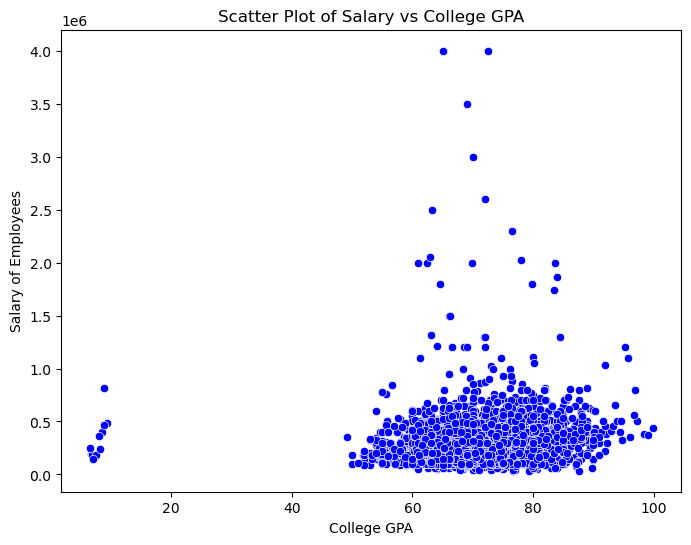

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=numerical_df, color='blue')

plt.xlabel('College GPA')
plt.ylabel('Salary of Employees')
plt.title('Scatter Plot of Salary vs College GPA')

plt.show()

### Majority of the people have their college GPA in between 60 to 90 and earn in the range of 2 Lakhs to 10 Lakhs per year

### Salary vs Job City

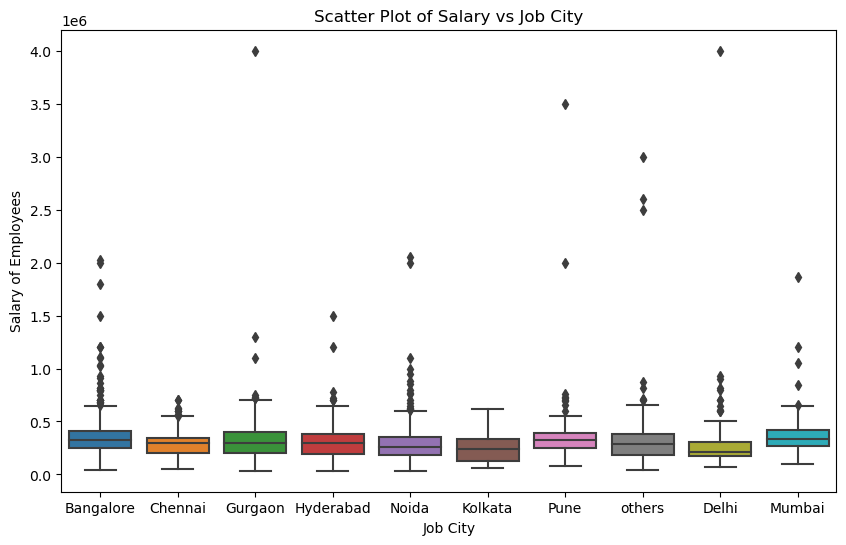

In [76]:
top_values=categorical_df['Job_City'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_City', y='Salary', data=df[df['Job_City'].isin(top_values)])
plt.xlabel('Job City')
plt.ylabel('Salary of Employees')
plt.title('Scatter Plot of Salary vs Job City')

plt.show()

### Salary vs Degree

<Figure size 1500x500 with 0 Axes>

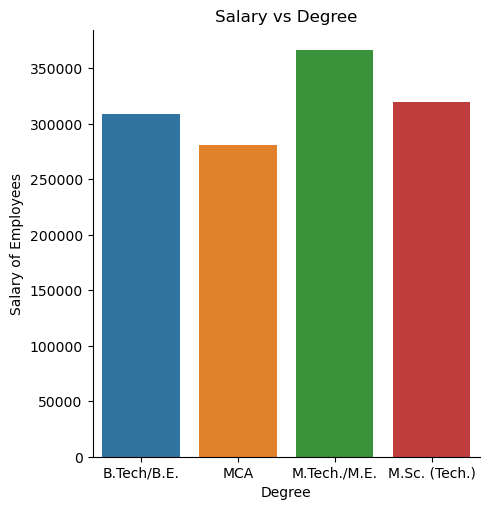

In [77]:
plt.figure(figsize=(15, 5))
sns.catplot(data=df, x="Degree", y="Salary",kind="bar", ci= None)
plt.xlabel('Degree')
plt.ylabel('Salary of Employees')
plt.title('Salary vs Degree')

plt.show()

### People who Completed M.Tech./M.E. Degree Earn more.

### Gender vs Specialization

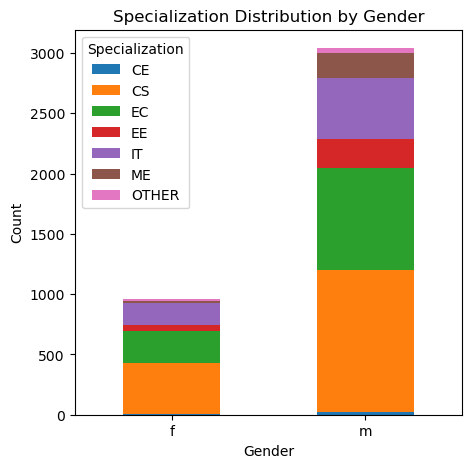

In [78]:
data = pd.crosstab(df['Gender'], df['Specialization'])

data.plot(kind='bar', stacked=True, figsize=(5, 5))
plt.title('Specialization Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.legend(title='Specialization')
plt.show()

### More number of Male and Female candidates have studies in Computer Science followed by Electronics Communication.

### Salary vs Gender

<Figure size 1500x500 with 0 Axes>

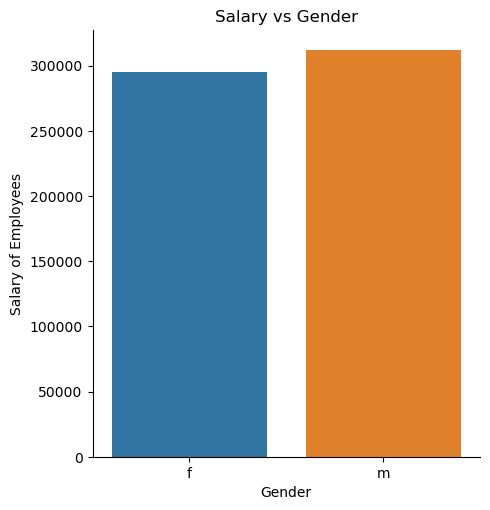

In [79]:
plt.figure(figsize=(15, 5))
sns.catplot(data=df, x="Gender", y="Salary",kind="bar", ci= None)
plt.xlabel('Gender')
plt.ylabel('Salary of Employees')
plt.title('Salary vs Gender')

plt.show()

### Males have slightly better pay than Females.

### Salary vs 12th Board

<Figure size 1500x500 with 0 Axes>

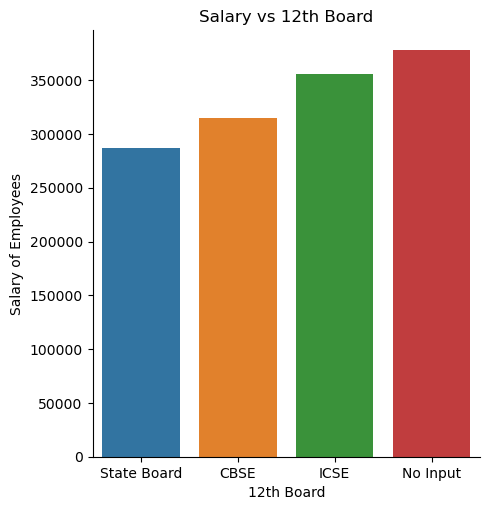

In [80]:
plt.figure(figsize=(15, 5))
sns.catplot(data=df, x="Board_12th", y="Salary",kind="bar", ci= None)
plt.xlabel('12th Board')
plt.ylabel('Salary of Employees')
plt.title('Salary vs 12th Board')

plt.show()

### People who did not provide their 12th Board and people from ICSE Board are earning more salary

### Comparision of Salary, Gender, Specialization

<Axes: xlabel='Specialization', ylabel='Salary'>

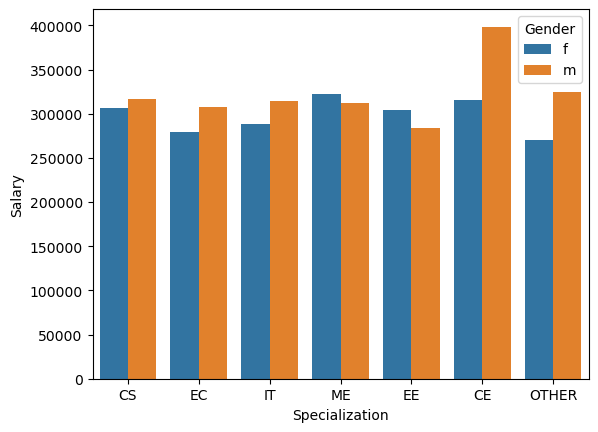

In [81]:
sns.barplot(data=df,x='Specialization',y='Salary', hue='Gender', ci=None)

### Males from Civil Engineering background are earning more.

## Research Questions

### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [83]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table.values)

In [84]:
print("Chi-Square Statistic:", chi2)
print("p-value:", pval)

if pval < 0.05:
    print("There is statistically significant evidence (p-value < 0.05) that gender and specialization are not independent.")
else:
    print("There is not statistically significant evidence (p-value >= 0.05) to reject the null hypothesis that gender and specialization are independent.")


Chi-Square Statistic: 56.163567014500835
p-value: 2.6975012719357195e-10
There is statistically significant evidence (p-value < 0.05) that gender and specialization are not independent.


### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [85]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [86]:
related_roles = ['java software engineer','software engineer','associate software engineer',
                 'jr. software engineer','assistant software engineer','software test engineer',
                 'junior software engineer','trainee software engineer','software development engineer',
                 'software trainee engineer','software engineer analyst','software engineer trainee',
                 'software engineer associate','software engineere','software engg','software test engineer (etl)',
                 'associate software engg','software eng']

for role in related_roles:
    df['Designation'].replace(role,'Software Engineer', inplace = True)

In [87]:
related_roles = ['programmer analyst','programmer analyst trainee','program analyst trainee']
for role in related_roles:
    df['Designation'].replace(role,'Programming Analyst', inplace = True)

In [88]:
related_roles = ['associate engineer','associate system engineer','associate test engineer']
for role in related_roles:
    df['Designation'].replace(role,'Programming Analyst', inplace = True)

In [101]:
Designation_required = ["Programming Analyst", "Software Engineer", "Hardware Engineer","Associate Engineer"]
Specialization_required = ["CS"]

Test_data = df[(df["Designation"].isin(Designation_required)) &
          (df["Specialization"].isin(Specialization_required)) & 
          (df['DOJ'].dt.year==df['GraduationYear'])
         ]

In [102]:
from scipy.stats import ttest_1samp

In [105]:
hypothesized_mean = 250000 + 300000 / 2
t_statistic, p_value = ttest_1samp(Test_data['Salary'], hypothesized_mean)

In [107]:
print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("We can reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

T-Statistic: -5.23668726608087
p-value: 3.100650716684894e-07
We can reject the null hypothesis


### Claims made by the Time of India article are invalid

## Creating a Research Question

### Is there any Relation between the College GPA and Salary

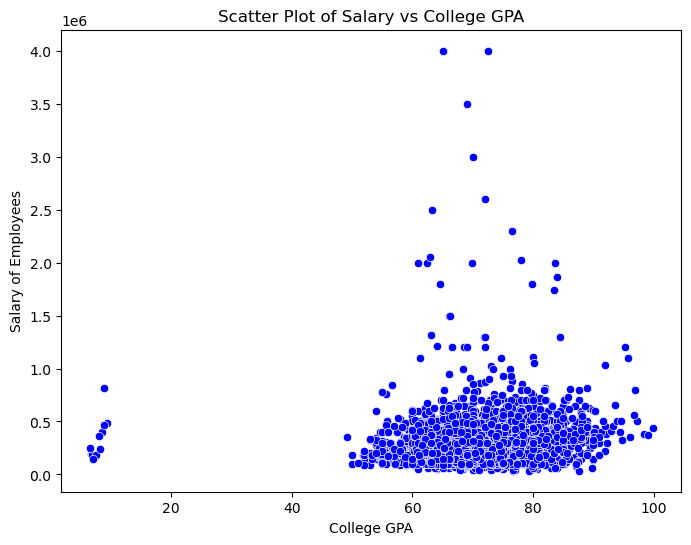

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=numerical_df, color='blue')

plt.xlabel('College GPA')
plt.ylabel('Salary of Employees')
plt.title('Scatter Plot of Salary vs College GPA')

plt.show()

In [110]:
from scipy.stats import pearsonr

In [113]:
correlation, p_value = pearsonr(df['collegeGPA'], df['Salary'])

print("Correlation coefficient (Pearson's r):", correlation)
print("p-value:", p_value)

if abs(correlation) > 0.3 and p_value < 0.05:
    direction = "positively" if correlation > 0 else "negatively"
    
    print(f"There is a {direction} statistically significant (p-value < 0.05) correlation between CollegeGPA and Salary (correlation coefficient = {correlation:.2f}).")

elif abs(correlation) <= 0.3:
    print("There is a weak correlation between CollegeGPA and Salary.")

else:
    print("There is a statistically significant correlation (p-value < 0.05) between CollegeGPA and Salary, but the direction is weak (|correlation| <= 0.3).")

Correlation coefficient (Pearson's r): 0.1301025190711259
p-value: 1.4702127110769944e-16
There is a weak correlation between CollegeGPA and Salary.


### Based on the results of the pearsons test, we can say that salary earned doesn't depend on the College GPA